In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [176]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [177]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [178]:
df=df.drop("Unnamed: 0",axis=1)

In [179]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [180]:
df.shape

(200, 4)

In [181]:
df= df.drop_duplicates()

In [182]:
df.shape

(200, 4)

In [183]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [184]:
# We can see there no null values so we are good to go!

In [185]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [186]:
# EDA

<AxesSubplot:title={'center':'TV'}, ylabel='Density'>

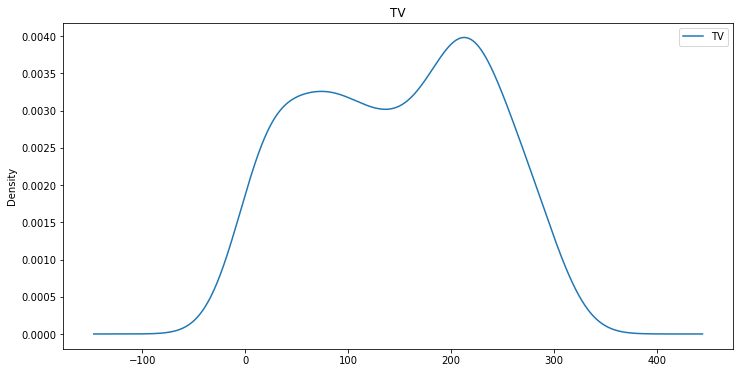

In [187]:
df[['TV']].plot(kind='kde', title='TV', figsize=(12,6))

In [188]:
df['TV'].skew()

-0.06985336213274573

<AxesSubplot:title={'center':'radio'}, ylabel='Density'>

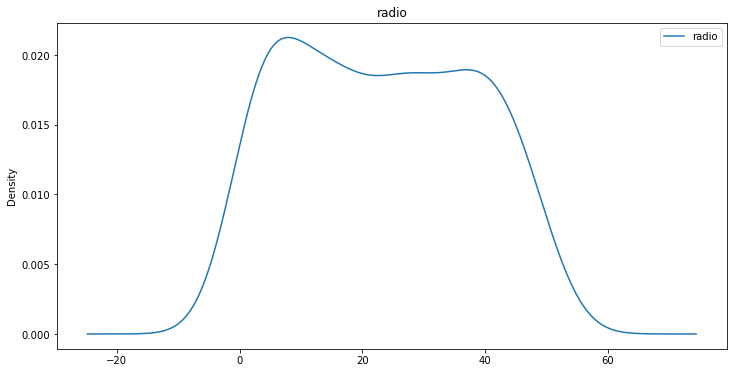

In [189]:
df[['radio']].plot(kind='kde', title='radio', figsize=(12,6))

In [190]:
df['radio'].skew()

0.09417463149664404

<AxesSubplot:title={'center':'newspaper'}, ylabel='Density'>

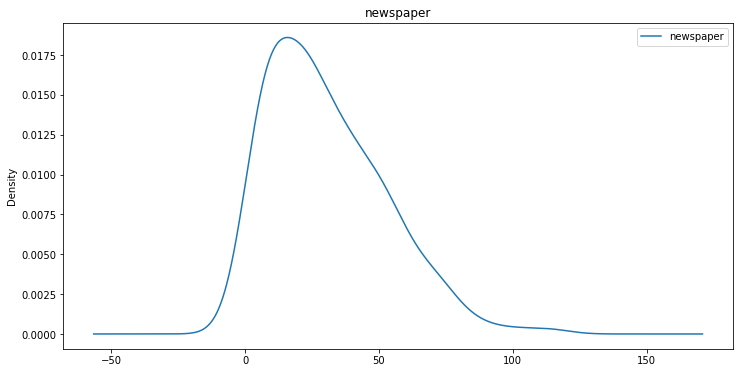

In [191]:
df[['newspaper']].plot(kind='kde', title='newspaper', figsize=(12,6))

In [192]:
df['newspaper'].skew()

0.8947204074986175

In [193]:
# clearly newspaper column is positively skewed, it seems to contain outliers

<AxesSubplot:title={'center':'sales'}, ylabel='Density'>

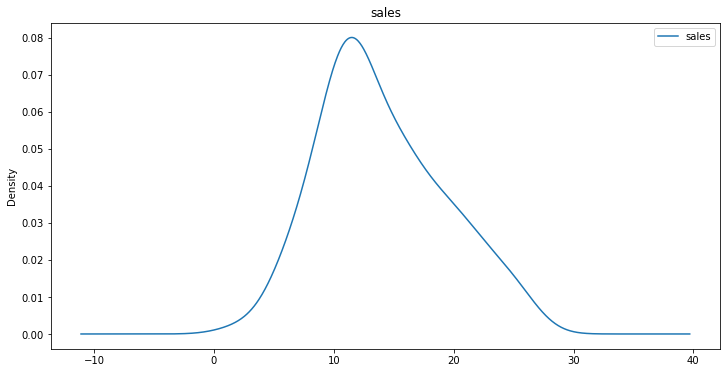

In [194]:
df[['sales']].plot(kind='kde', title='sales', figsize=(12,6))

In [195]:
df['sales'].skew()

0.4075714250767127

In [196]:
# Sales column is also slightly skewed; let us check for the outliers further

In [197]:
# Mutual correlations

<AxesSubplot:xlabel='TV', ylabel='sales'>

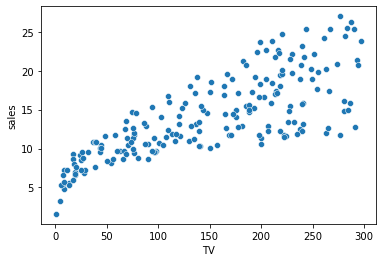

In [198]:
sns.scatterplot(x='TV',y='sales', data=df)

In [199]:
# TV has a positive correlation with sales

<AxesSubplot:xlabel='radio', ylabel='sales'>

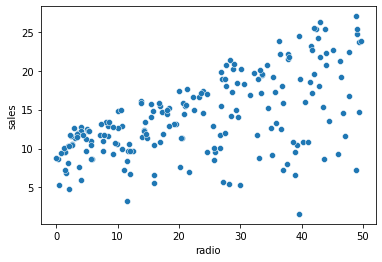

In [200]:
sns.scatterplot(x='radio',y='sales', data=df)

In [201]:
# Radio has a positive correlation with sales though there are some points where radio advertisements are high but still sales values are low

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

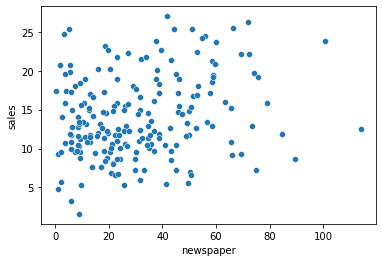

In [202]:
sns.scatterplot(x='newspaper',y='sales', data=df)

In [203]:
# Due to outliers clearly correlation is hard to consider!

In [204]:
# outliers

In [205]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [206]:
# Boxplot for outliers

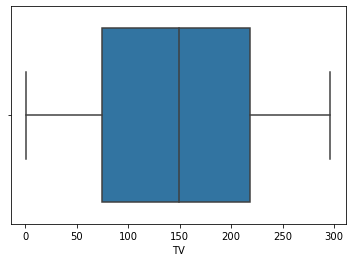

In [207]:
sns.boxplot(df['TV'])
plt.show()

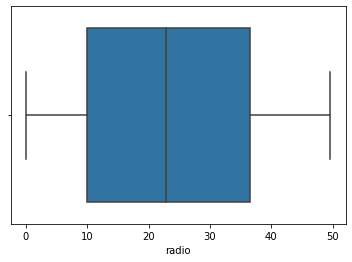

In [208]:
sns.boxplot(df['radio'])
plt.show()

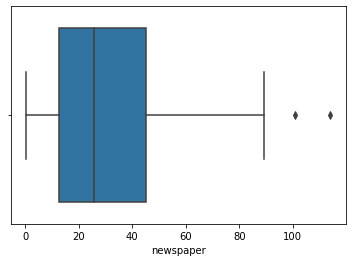

In [209]:
sns.boxplot(df['newspaper'])
plt.show()

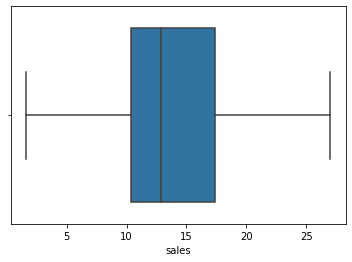

In [210]:
sns.boxplot(df['sales'])
plt.show()

In [211]:
# Clearly only newspaper has outliers

In [212]:
# let us remove this outliers of newspaper

In [213]:
df['newspaper'].min()

0.3

In [214]:
df['newspaper'].max()

114.0

In [215]:
df.shape

(200, 4)

In [216]:
# z-score method for outlier removal

In [217]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold= 3
np.where(z>3)

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))

In [218]:
df= df[(z<3).all(axis=1)]
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [219]:
df.shape

(198, 4)

<AxesSubplot:xlabel='newspaper'>

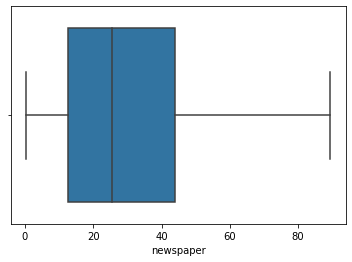

In [220]:
sns.boxplot(df['newspaper'])

In [221]:
# outliers are removed from newspaper, now let us visualize it...

<AxesSubplot:title={'center':'newspaper'}, ylabel='Density'>

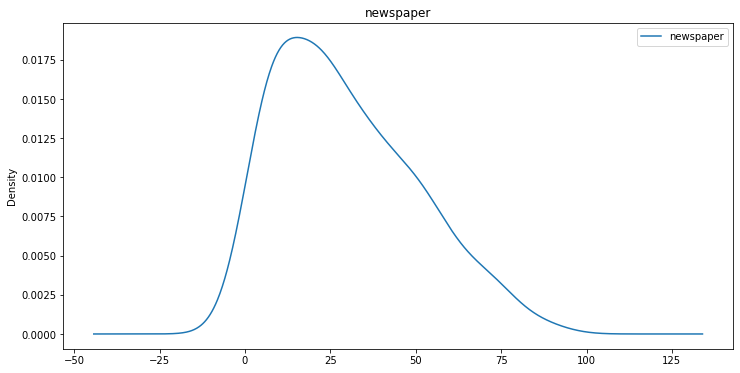

In [222]:
df[['newspaper']].plot(kind='kde', title='newspaper', figsize=(12,6))

In [223]:
df['newspaper'].skew()

0.650111551724088

In [224]:
df.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

In [225]:
# we have been able to reduce the skewness of the newspaper column to some extend.

<AxesSubplot:>

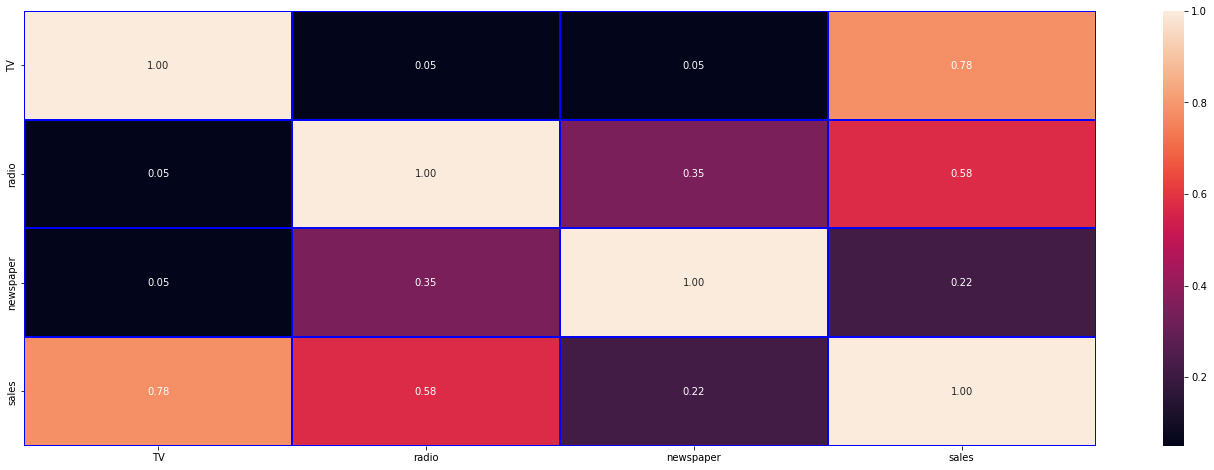

In [226]:
#Heatmap
import matplotlib.pyplot as plt
plt.figure(figsize=(24,8))
sns.heatmap(df.corr(), annot= True, linewidths= 0.1, linecolor= 'blue', fmt= '0.2f')

In [227]:
# From the Heat map we can see that almost all columns are positively correleated

In [228]:
# VIF to check multicolinearity

In [229]:
vif= df.drop('sales',axis=1)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_scl= sc.fit_transform(vif)

In [230]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [231]:
VIF= pd.DataFrame()
VIF['features']= vif.columns
VIF['VIF']= [variance_inflation_factor(df_scl,i ) for i in range(len(vif.columns))]
VIF

,features,VIF
0,TV,1.003863
1,radio,1.137887
2,newspaper,1.137631


In [232]:
# No multicolinearity found between independent variables as safe range is [-5,5]

In [233]:
# Train- Test split and scaling

In [234]:
X= df.drop('sales',axis=1)
y= df['sales']

In [235]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [236]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 198, dtype: float64

In [237]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

In [238]:
scaler = StandardScaler()
X= scaler.fit_transform(X)
X

array([[ 0.97869734,  0.98952135,  1.93299778],
       [-1.19901165,  1.09070498,  0.75131275],
       [-1.51933199,  1.53591293,  1.93790103],
       [ 0.05645636,  1.22561648,  1.40834924],
       [ 0.40024339, -0.83178391,  1.40344598],
       [-1.61906543,  1.73828018,  2.2173867 ],
       [-1.04647815,  0.6522426 , -0.30779084],
       [-0.31079737, -0.23817331, -0.89127846],
       [-1.62023876, -1.41864895, -1.41102374],
       [ 0.62317696, -1.38492107, -0.42056576],
       [-0.94557138, -1.16906267, -0.27346804],
       [ 0.79800381,  0.05863199, -1.26392602],
       [-1.44189191,  0.80739083,  1.77119028],
       [-0.57714432, -1.04764232, -1.10702179],
       [ 0.67363035,  0.65898817,  0.79544207],
       [ 0.57155024,  1.65733328,  1.13376683],
       [ 1.58061798,  1.1109417 ,  1.27596129],
       [-0.90919801, -0.17746313, -0.56276022],
       [ 0.0071763 ,  0.05188642, -0.52353416],
       [ 0.84141719,  0.30821827,  1.15828311],
       [ 1.06435076, -1.21628169, -0.307

In [239]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [240]:
#Machine learning

In [241]:
#Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

In [242]:
lr= LinearRegression()
rf= RandomForestRegressor()
svr= SVR()
knn= KNeighborsRegressor(n_neighbors =4)
rd= Ridge()
ls= Lasso()

In [243]:
# Linear regression 
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

#mean_squared_error of train set
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

#mean_squared_error of test set
p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

# R2 score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

lrscore= cross_val_score(lr, X, y, cv=5)
lrc= lrscore.mean()
print('Cross Val Score:', lrc*100)

print('difference of cross-validation and R2 score is:%.2f'%abs(lrc*100- r2_score(y_test, y_test_pred)*100))

Mean Squared error of training set :2.273222
Mean Squared error of testing set :5.002033
R2 Score of training set:0.91
R2 Score of testing set:0.84
Cross Val Score: 88.5360575668391
difference of cross-validation and R2 score is:4.36


In [244]:
# Random Forest
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

#mean_squared_error of train set
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

#mean_squared_error of test set
p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

# R2 score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

rfscore= cross_val_score(rf, X, y, cv=5)
rfc= rfscore.mean()
print('Cross Val Score:', rfc*100)

print('difference of cross-validation and R2 score is:%.2f'%abs(rfc*100- r2_score(y_test, y_test_pred)*100))

Mean Squared error of training set :0.085367
Mean Squared error of testing set :0.882404
R2 Score of training set:1.00
R2 Score of testing set:0.97
Cross Val Score: 97.66340743419151
difference of cross-validation and R2 score is:0.46


In [245]:
# SVR
svr.fit(X_train, y_train)
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

#mean_squared_error of train set
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

#mean_squared_error of test set
p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

# R2 score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

svrscore= cross_val_score(svr, X, y, cv=5)
svrc= svrscore.mean()
print('Cross Val Score:', svrc*100)


print('difference of cross-validation and R2 score is:%.2f'%abs(svrc*100- r2_score(y_test, y_test_pred)*100))

Mean Squared error of training set :1.547499
Mean Squared error of testing set :4.213073
R2 Score of training set:0.94
R2 Score of testing set:0.87
Cross Val Score: 91.05355050541174
difference of cross-validation and R2 score is:4.38


In [246]:
#KNN
knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

#mean_squared_error of train set
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

#mean_squared_error of test set
p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

# R2 score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

knnscore= cross_val_score(knn, X, y, cv=5)
knnc= knnscore.mean()
print('Cross Val Score:', knnc*100)

print('difference of cross-validation and R2 score is:%.2f'%abs(knnc*100- r2_score(y_test, y_test_pred)*100))

Mean Squared error of training set :0.827286
Mean Squared error of testing set :3.015516
R2 Score of training set:0.97
R2 Score of testing set:0.90
Cross Val Score: 94.42055064590332
difference of cross-validation and R2 score is:3.96


In [247]:
# Ridge
rd.fit(X_train, y_train)
y_train_pred = rd.predict(X_train)
y_test_pred = rd.predict(X_test)

#mean_squared_error of train set
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

#mean_squared_error of test set
p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

# R2 score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

rdscore= cross_val_score(rd, X, y, cv=5)
rdc= rdscore.mean()
print('Cross Val Score:', rdc*100)

print('difference of cross-validation and R2 score is:%.2f'%abs(rdc*100- r2_score(y_test, y_test_pred)*100))

Mean Squared error of training set :2.274175
Mean Squared error of testing set :5.000996
R2 Score of training set:0.91
R2 Score of testing set:0.84
Cross Val Score: 88.54497131539671
difference of cross-validation and R2 score is:4.37


In [248]:
# Lasso
ls.fit(X_train, y_train)
y_train_pred = rd.predict(X_train)
y_test_pred = rd.predict(X_test)

#mean_squared_error of train set
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

#mean_squared_error of test set
p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

# R2 score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

lsscore= cross_val_score(ls, X, y, cv=5)
lsc= lrscore.mean()
print('Cross Val Score:', lsc*100)

print('difference of cross-validation and R2 score is:%.2f'%abs(lsc*100- r2_score(y_test, y_test_pred)*100))

Mean Squared error of training set :2.274175
Mean Squared error of testing set :5.000996
R2 Score of training set:0.91
R2 Score of testing set:0.84
Cross Val Score: 88.5360575668391
difference of cross-validation and R2 score is:4.36


In [249]:
# from above clearly the absolute value of difference of cross-validation and R2 score is minimum for random forest.
# So we will go with this ML process as here the efficiency od this will be maximum.

In [250]:
# Random Forest
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

#mean_squared_error of train set
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

#mean_squared_error of test set
p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

# R2 score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

rfscore= cross_val_score(rf, X, y, cv=5)
rfc= rfscore.mean()
print('Cross Val Score:', rfc*100)

print('difference of cross-validation and R2 score is:%.2f'%abs(rfc*100- r2_score(y_test, y_test_pred)*100))

Mean Squared error of training set :0.079815
Mean Squared error of testing set :0.894365
R2 Score of training set:1.00
R2 Score of testing set:0.97
Cross Val Score: 97.62945118453521
difference of cross-validation and R2 score is:0.46


In [251]:
# Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import warnings 
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

parameters= {'criterion': ['mse','mae'],
            'max_features':['auto','sqrt','log2'], 'max_depth':[4,5,6,7,8], 'min_samples_split': [1,2,3]}
rf= RandomForestRegressor()
clf= GridSearchCV(rf, parameters, cv= 5)
clf.fit(X_train, y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_depth': 7, 'max_features': 'auto', 'min_samples_split': 2}


In [252]:
rf= RandomForestRegressor(criterion= 'mae', max_depth= 8, max_features= 'auto',min_samples_split= 2)
rf.fit(X_train, y_train)
rf.score(X_train, y_train)
pred_decision= rf.predict(X_test)

rfs= r2_score(y_test, pred_decision)
print('R2 score:', rfs*100)

rfscore= cross_val_score(rf, X, y, cv=5)
rfc= rfscore.mean()
print('Cross Val Score:', rfc*100)

R2 score: 97.39319528721802
Cross Val Score: 97.59040700959278


In [253]:
print('difference of cross-validation and R2 score is:%.2f'%abs(rfc*100- r2_score(y_test, y_test_pred)*100))

difference of cross-validation and R2 score is:0.42


In [254]:
# Efficiency of this model has been improved!

In [255]:
import pickle
filename= 'churn.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [256]:
[]

[]

In [257]:
# conclusion

In [258]:
loaded_model=pickle.load(open('churn.pkl','rb'))
result= loaded_model.score(X_test, y_test)
print(result*100)

97.39319528721802


In [259]:
conclusion= pd.DataFrame([loaded_model.predict(X_test)[:],pred_decision[:]], index=['Predicted','Original'])

In [261]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Predicted,18.336,23.1275,11.0755,7.735,18.8985,5.501,16.2025,21.6,12.2235,15.2395,...,11.0935,18.97,6.5725,21.141,10.495,12.154,11.3465,8.821,5.509,10.3855
Original,18.336,23.1275,11.0755,7.735,18.8985,5.501,16.2025,21.6,12.2235,15.2395,...,11.0935,18.97,6.5725,21.141,10.495,12.154,11.3465,8.821,5.509,10.3855
